USING THE DATA: ASIK RT4 NWIN CLND BLNCD


RT4: 64 scans,

NWIN: WITH NEW INDO SAMPLES SCANS,

CLND: CLEANED FROM OUTLIERS,

BLNCD: THE TOTAL NUMBER ALREADY BALANCED BETWEEN THAI AND NON-THAI

In [21]:
import pandas as pd
import numpy as np

# Retry loading the data_0set
data_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_NIR_DIST_3b.csv")

# Check the columns and first few rows of the data_0
data_0_info = data_0.info()
data_0_head = data_0.head()

# Check for empty cells and NaN values
nan_summary = data_0.isna().sum()

data_0_info, data_0_head, nan_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Columns: 1908 entries, prov_char to thnoth_name_encoded
dtypes: float64(1899), int64(1), object(8)
memory usage: 13.7+ MB


(None,
   prov_char country_char           wavenumber     11544     11540     11536  \
 0       KAX           ID  ID-KAX-088-2401-001  0.290252  0.290122  0.290044   
 1       KBX           ID  ID-KBX-068-2306-003  0.522845  0.522798  0.522826   
 2       BBX           ID  ID-BBX-095-2401-004 -0.144108 -0.144008 -0.143893   
 3       SUX           ID  ID-SUX-074-2311-001  0.333905  0.333777  0.333785   
 4       SUX           ID  ID-SUX-073-2311-001  1.522433  1.521460  1.521133   
 
       11532     11528     11524     11520  ...      3964      3960      3956  \
 0  0.290029  0.290042  0.289978  0.289851  ...  3.558086  3.542757  3.530849   
 1  0.522669  0.522414  0.522217  0.522070  ...  3.680422  3.655416  3.629388   
 2 -0.143777 -0.143686 -0.143667 -0.143678  ...  3.650478  3.623180  3.614590   
 3  0.333700  0.333522  0.333453  0.333446  ...  3.601331  3.566453  3.539593   
 4  1.521072  1.521494  1.522300  1.521840  ...  4.103365  4.125110  4.113971   
 
        3952  tgp_name 

In [22]:
print(data_0.describe(include='all'))

       prov_char country_char           wavenumber       11544       11540  \
count        940          940                  940  940.000000  940.000000   
unique        16            3                  119         NaN         NaN   
top          RIX           TH  ID-RIX-076-2401-001         NaN         NaN   
freq         209          470                   17         NaN         NaN   
mean         NaN          NaN                  NaN    0.793800    0.793698   
std          NaN          NaN                  NaN    0.810035    0.809977   
min          NaN          NaN                  NaN   -0.237611   -0.237549   
25%          NaN          NaN                  NaN    0.056839    0.056842   
50%          NaN          NaN                  NaN    0.576575    0.576300   
75%          NaN          NaN                  NaN    1.466195    1.466224   
max          NaN          NaN                  NaN    2.702062    2.699505   

             11536       11532       11528       11524       11

In [23]:
data_0.columns

Index(['prov_char', 'country_char', 'wavenumber', '11544', '11540', '11536',
       '11532', '11528', '11524', '11520',
       ...
       '3964', '3960', '3956', '3952', 'tgp_name', 'dgp_name', 'fgp_name',
       'country_name', 'thnoth_name', 'thnoth_name_encoded'],
      dtype='object', length=1908)

In [24]:
data_1 = data_0.copy()

In [25]:
# Delete the specified columns
data_1 = data_0.drop(columns=['thnoth_name_encoded', 'country_char'])

# Rename the column 'wavenumber' to 'sample_code'
data_1 = data_1.rename(columns={'wavenumber': 'sample_code'})

# Display the first few rows of the modified data_1frame
print(data_1.head())

  prov_char          sample_code     11544     11540     11536     11532  \
0       KAX  ID-KAX-088-2401-001  0.290252  0.290122  0.290044  0.290029   
1       KBX  ID-KBX-068-2306-003  0.522845  0.522798  0.522826  0.522669   
2       BBX  ID-BBX-095-2401-004 -0.144108 -0.144008 -0.143893 -0.143777   
3       SUX  ID-SUX-074-2311-001  0.333905  0.333777  0.333785  0.333700   
4       SUX  ID-SUX-073-2311-001  1.522433  1.521460  1.521133  1.521072   

      11528     11524     11520     11516  ...      3968      3964      3960  \
0  0.290042  0.289978  0.289851  0.289798  ...  3.572119  3.558086  3.542757   
1  0.522414  0.522217  0.522070  0.521891  ...  3.678293  3.680422  3.655416   
2 -0.143686 -0.143667 -0.143678 -0.143627  ...  3.663113  3.650478  3.623180   
3  0.333522  0.333453  0.333446  0.333381  ...  3.640250  3.601331  3.566453   
4  1.521494  1.522300  1.521840  1.519873  ...  4.108162  4.103365  4.125110   

       3956      3952  tgp_name  dgp_name  fgp_name  country_n

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

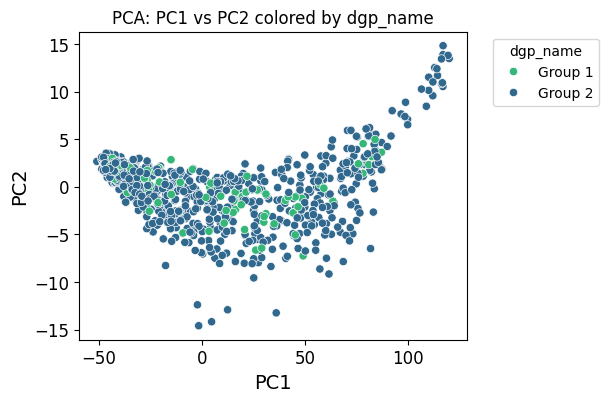

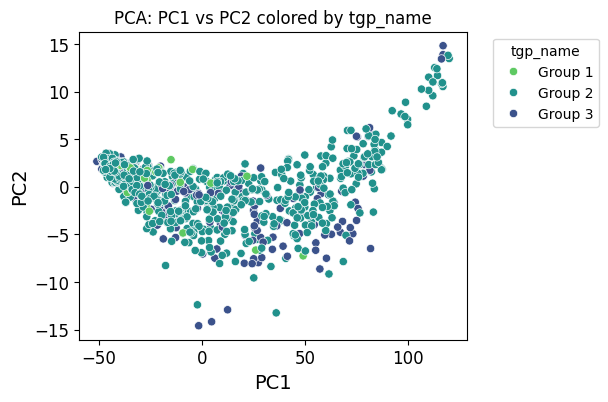

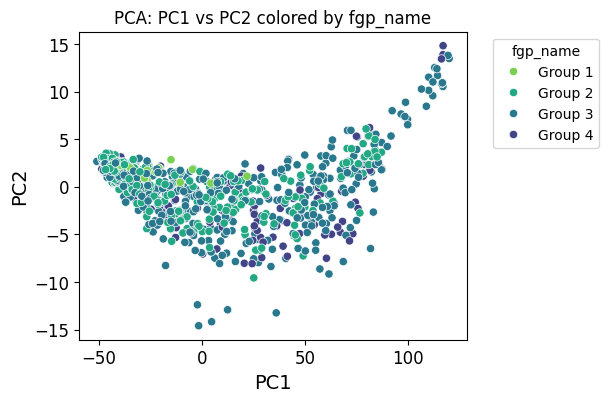

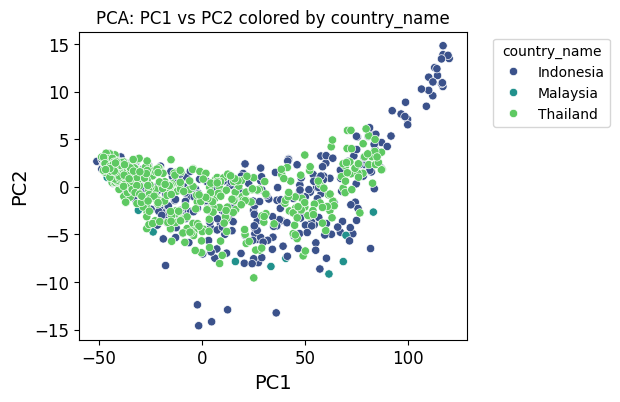

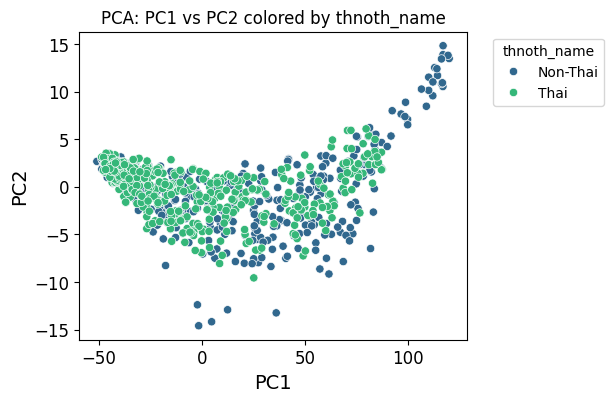

In [27]:
# Separate features and target variables
features = data_1.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_dgp = data_1['dgp_name']
targets_tgp = data_1['tgp_name']
targets_fgp = data_1['fgp_name']
targets_country = data_1['country_name']
targets_thnoth = data_1['thnoth_name']

# Standardize the features
scaler_1 = StandardScaler()
X_scaled_1 = scaler_1.fit_transform(features)

# Perform PCA_1
pca_1 = PCA(n_components=4)
pca_1_result = pca_1.fit_transform(X_scaled_1)
pca_1_df = pd.DataFrame(data=pca_1_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Add target columns for coloring
pca_1_df['dgp_name'] = targets_dgp
pca_1_df['tgp_name'] = targets_tgp
pca_1_df['fgp_name'] = targets_fgp
pca_1_df['country_name'] = targets_country
pca_1_df['thnoth_name'] = targets_thnoth

# Plotting function
def plot_pca_1(x, y, color_by):
    plt.figure(figsize=(5, 4))
    scatter = sns.scatterplot(data=pca_1_df, x=x, y=y, hue=color_by, palette='viridis')
    plt.title(f'PCA: {x} vs {y} colored by {color_by}')
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    
    plt.tick_params(axis='both', which='major', labelsize=12)

    # Set legend in alphabetical order
    handles, labels = scatter.get_legend_handles_labels()
    sorted_labels = sorted(zip(labels, handles), key=lambda t: t[0])
    labels, handles = zip(*sorted_labels)
    plt.legend(handles, labels, title=color_by, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

# Plotting the PCA results
plot_pca_1('PC1', 'PC2', 'dgp_name')
plot_pca_1('PC1', 'PC2', 'tgp_name')
plot_pca_1('PC1', 'PC2', 'fgp_name')
plot_pca_1('PC1', 'PC2', 'country_name')
plot_pca_1('PC1', 'PC2', 'thnoth_name')

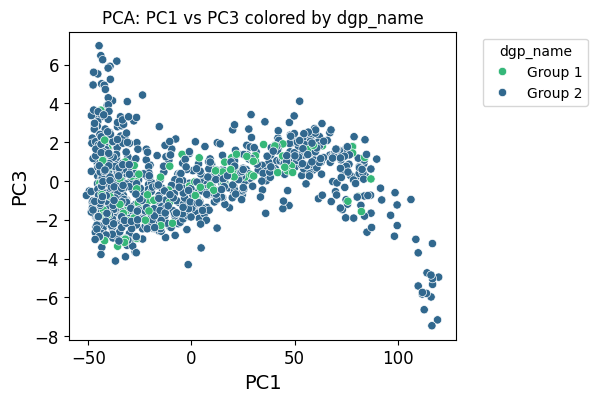

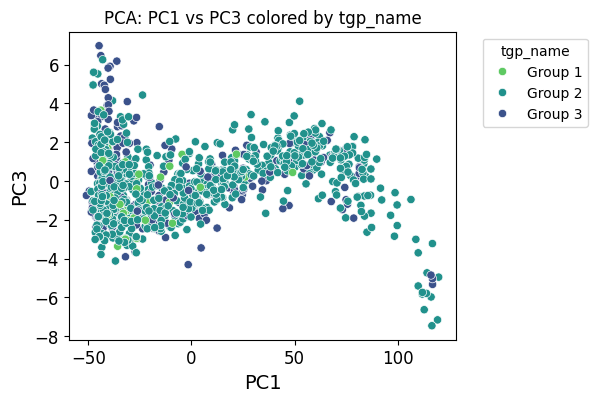

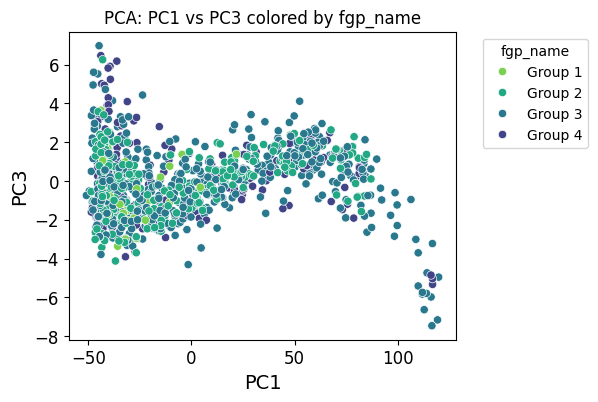

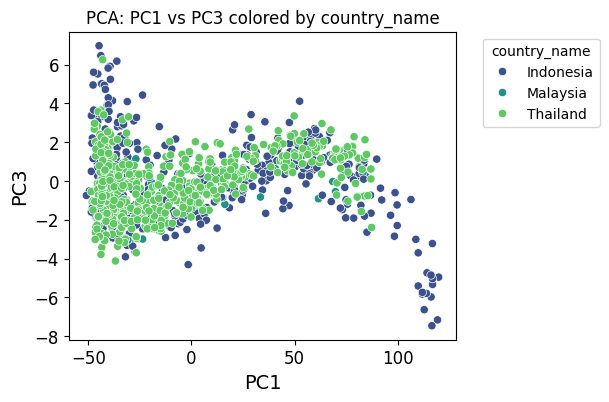

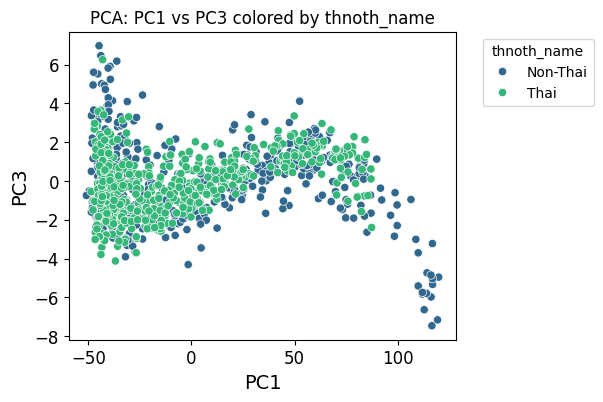

In [28]:
plot_pca_1('PC1', 'PC3', 'dgp_name')
plot_pca_1('PC1', 'PC3', 'tgp_name')
plot_pca_1('PC1', 'PC3', 'fgp_name')
plot_pca_1('PC1', 'PC3', 'country_name')
plot_pca_1('PC1', 'PC3', 'thnoth_name')

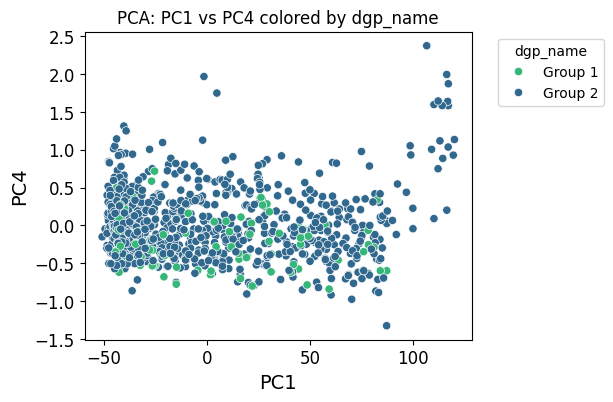

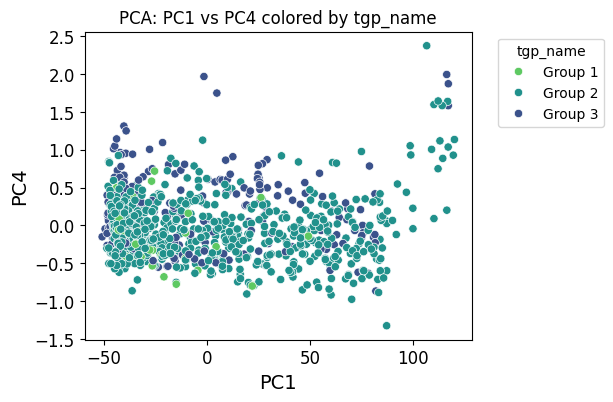

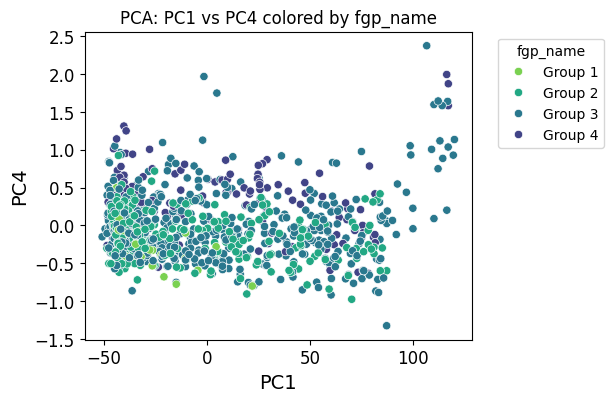

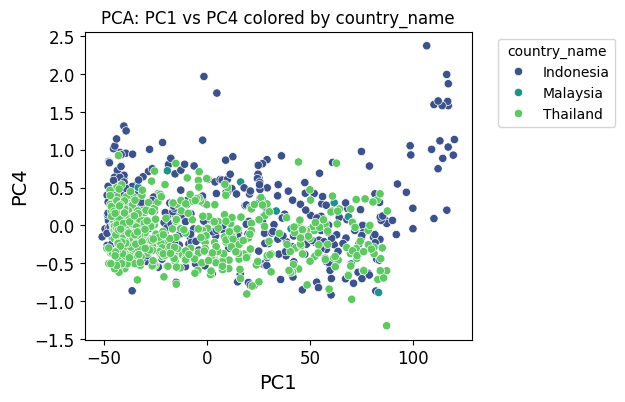

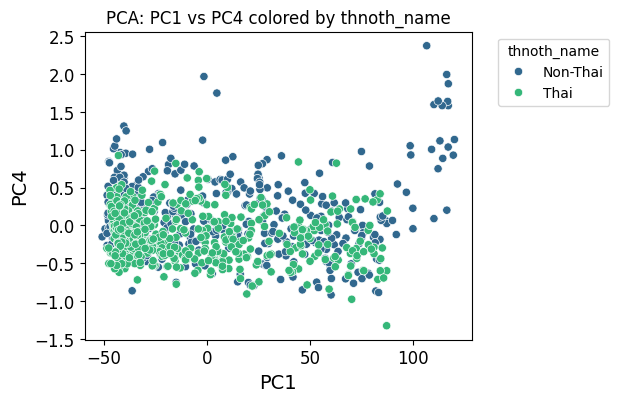

In [29]:
plot_pca_1('PC1', 'PC4', 'dgp_name')
plot_pca_1('PC1', 'PC4', 'tgp_name')
plot_pca_1('PC1', 'PC4', 'fgp_name')
plot_pca_1('PC1', 'PC4', 'country_name')
plot_pca_1('PC1', 'PC4', 'thnoth_name')

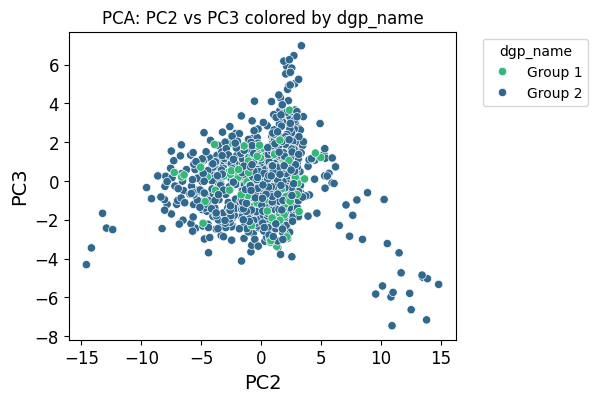

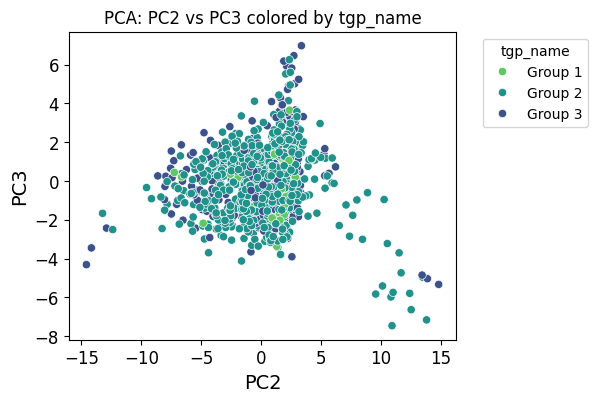

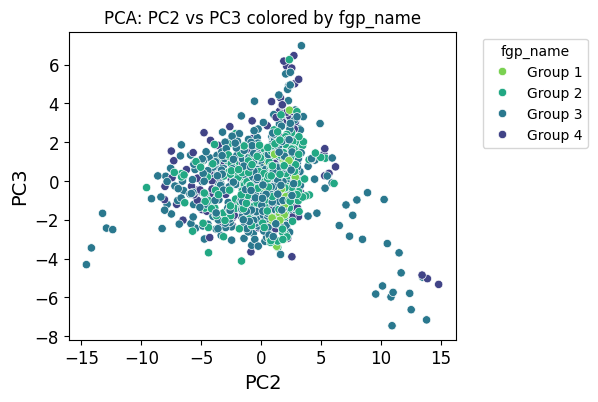

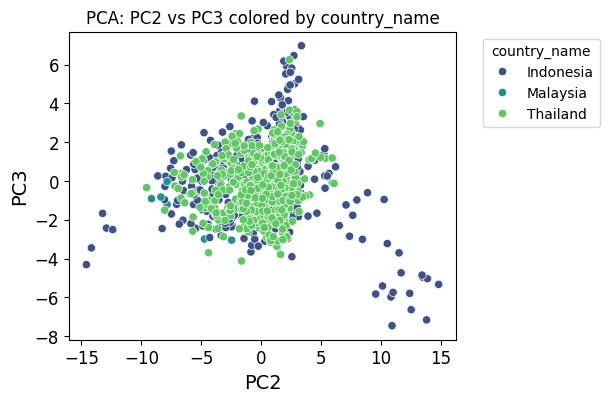

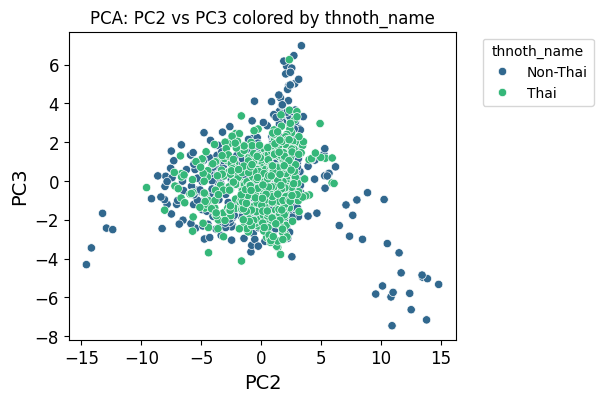

In [30]:
plot_pca_1('PC2', 'PC3', 'dgp_name')
plot_pca_1('PC2', 'PC3', 'tgp_name')
plot_pca_1('PC2', 'PC3', 'fgp_name')
plot_pca_1('PC2', 'PC3', 'country_name')
plot_pca_1('PC2', 'PC3', 'thnoth_name')

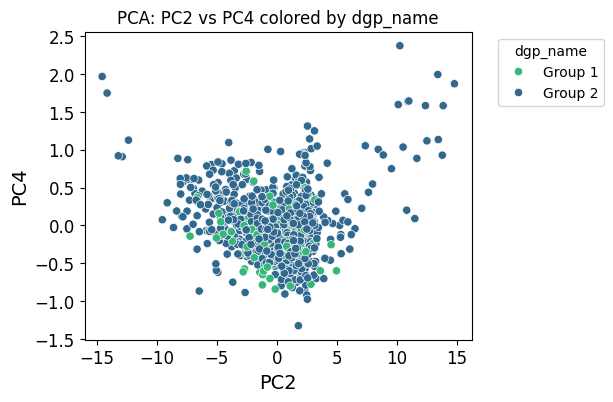

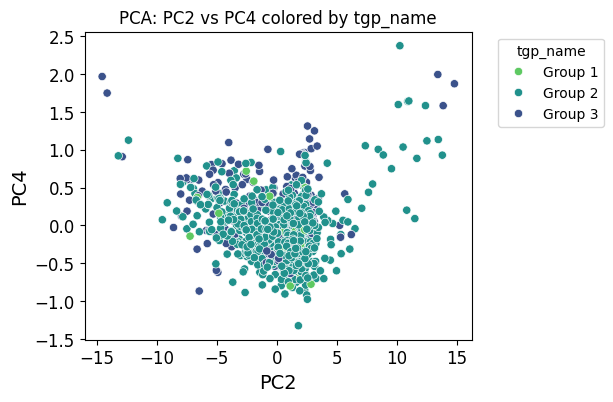

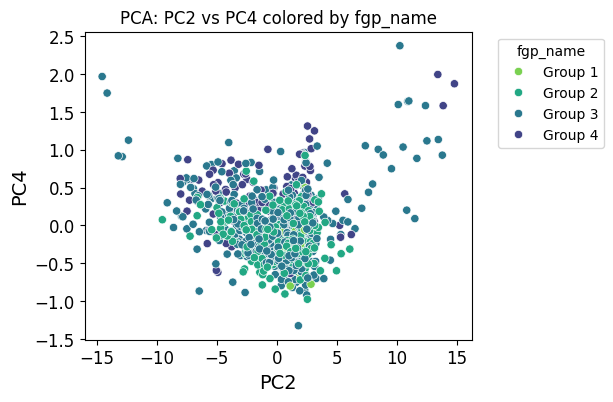

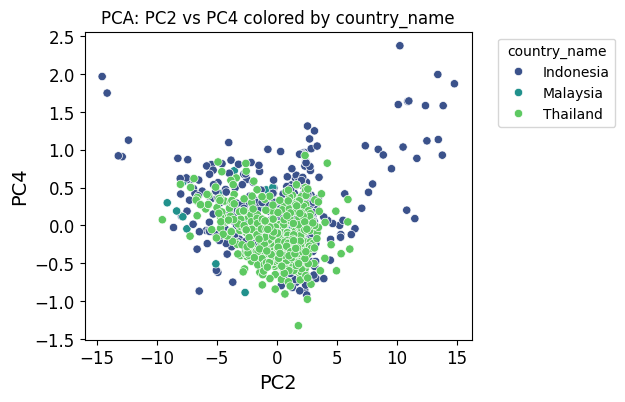

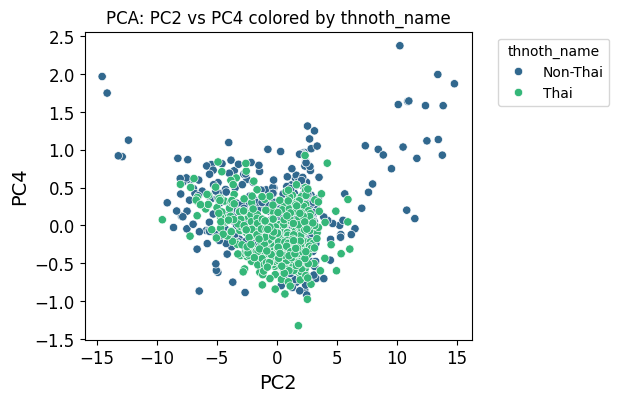

In [31]:
plot_pca_1('PC2', 'PC4', 'dgp_name')
plot_pca_1('PC2', 'PC4', 'tgp_name')
plot_pca_1('PC2', 'PC4', 'fgp_name')
plot_pca_1('PC2', 'PC4', 'country_name')
plot_pca_1('PC2', 'PC4', 'thnoth_name')

In [32]:
# Get the wavenumbers from the columns
wavenumbers = features.columns.astype(float)

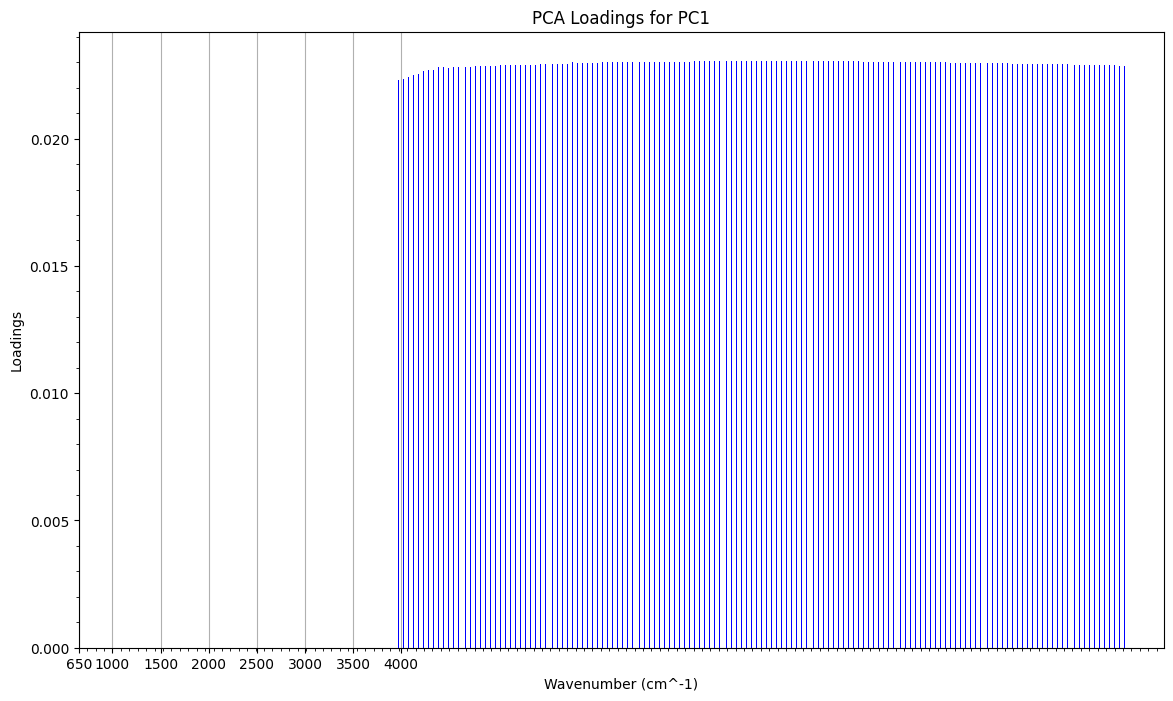

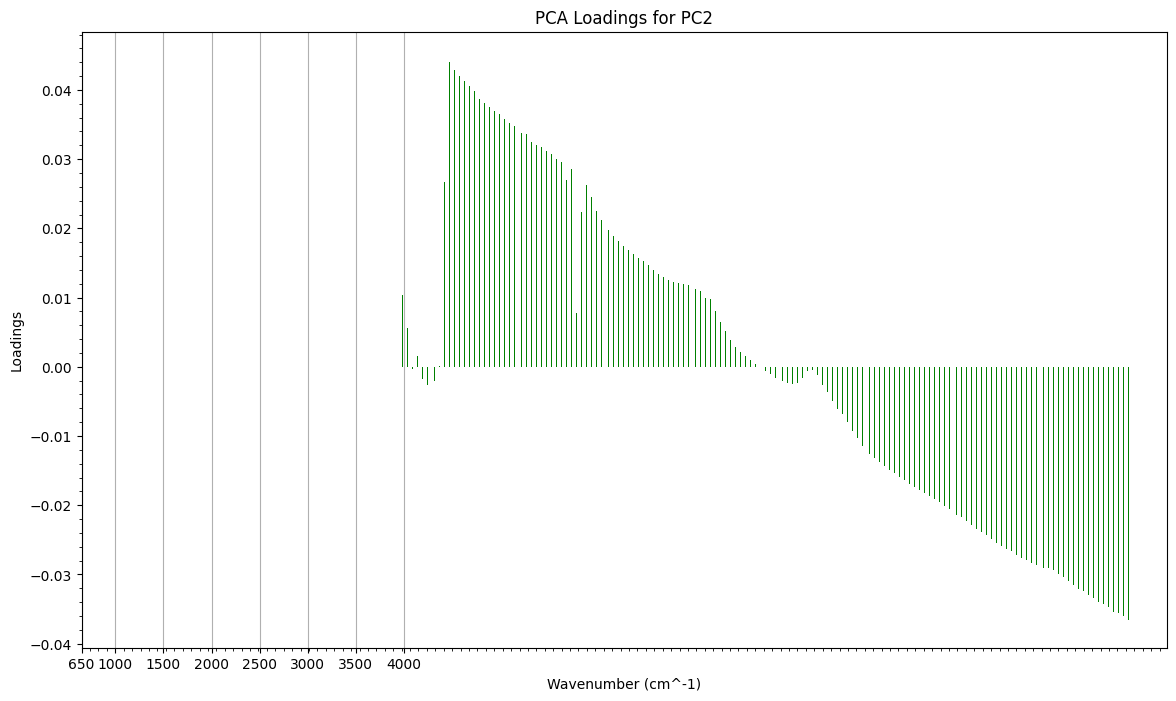

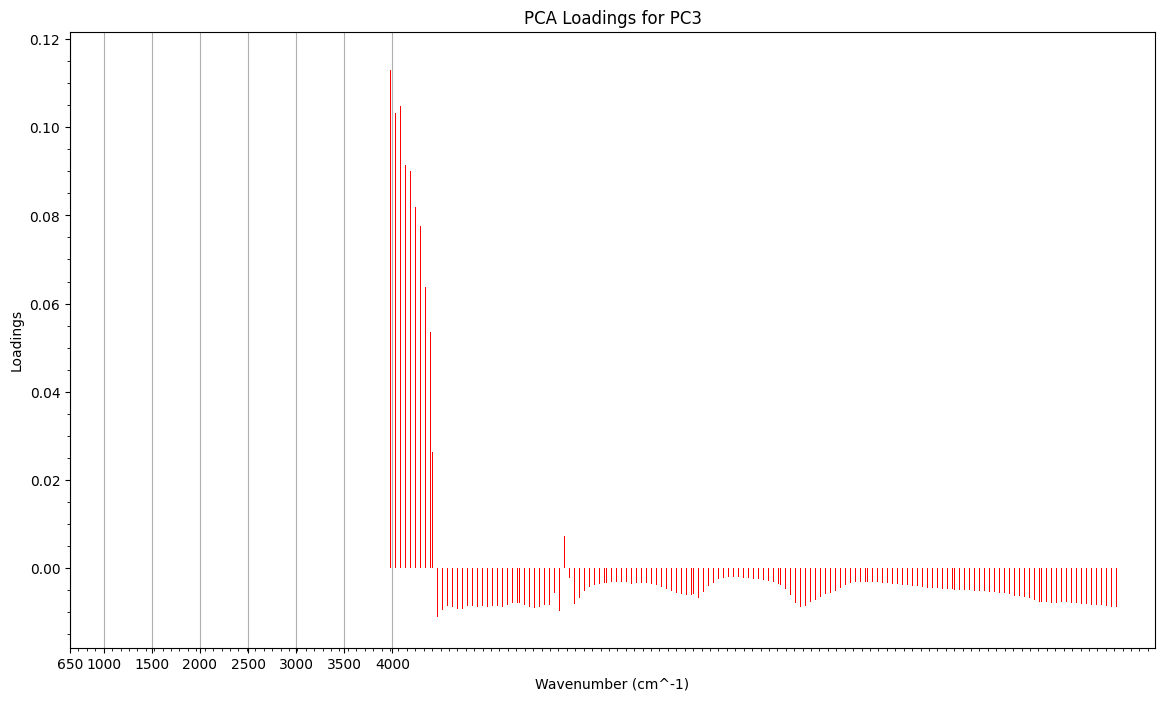

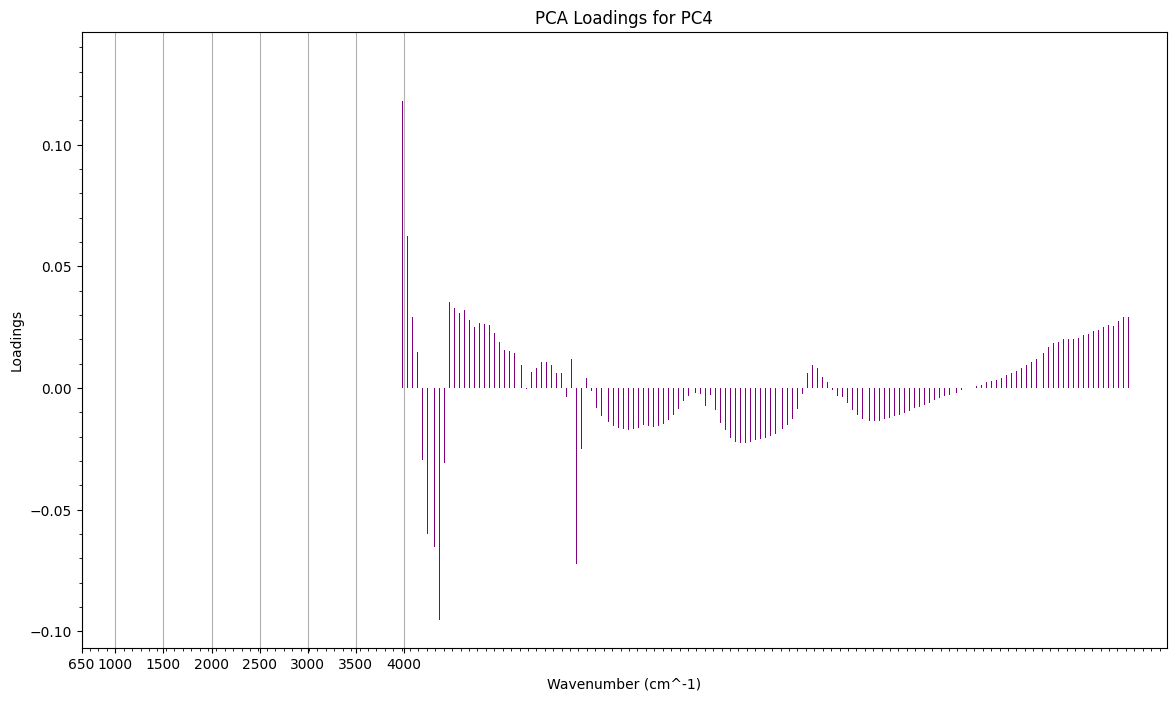

              PC1       PC2       PC3       PC4
11544.0  0.022867 -0.036525 -0.008850  0.029739
11540.0  0.022867 -0.036451 -0.008903  0.029662
11536.0  0.022867 -0.036467 -0.008859  0.029323
11532.0  0.022867 -0.036538 -0.008757  0.028979
11528.0  0.022867 -0.036511 -0.008761  0.029180
...           ...       ...       ...       ...
11284.0  0.022888 -0.034376 -0.008285  0.026132
11280.0  0.022888 -0.034416 -0.008222  0.025794
11276.0  0.022888 -0.034434 -0.008195  0.025353
11272.0  0.022889 -0.034344 -0.008258  0.025211
11268.0  0.022890 -0.034242 -0.008343  0.025161

[70 rows x 4 columns]


In [36]:
# Get the loadings
loadings_1 = pca_1.components_

# Create a DataFrame for the loadings
loadings_1_df = pd.DataFrame(loadings_1.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=wavenumbers)

# Plot the PCA loadings one by one
def plot_loadings_1(component, color):
    plt.figure(figsize=(14, 8))
    plt.bar(loadings_1_df.index, loadings_1_df[component], color=color)
    plt.title(f'PCA Loadings for {component}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(ticks=[4000, 3500, 3000, 2500, 2000, 1500, 1000, 650], labels=[4000, 3500, 3000, 2500, 2000, 1500, 1000, 650])
    plt.minorticks_on()
    plt.grid(True, axis='x')
    plt.show()

# Plot loadings for PC1
plot_loadings_1('PC1', 'blue')

# Plot loadings for PC2
plot_loadings_1('PC2', 'green')

# Plot loadings for PC3
plot_loadings_1('PC3', 'red')

# Plot loadings for PC4
plot_loadings_1('PC4', 'purple')

# Display the loadings DataFrame
print(loadings_1_df.head(70))

In [34]:
# Create a DataFrame to hold the top 30 most influencing wavenumbers for each principal component
top_loadings = {}

for component in loadings_1_df.columns:
    # Get the absolute loadings and sort them in descending order
    sorted_loadings = loadings_1_df[component].abs().sort_values(ascending=False)
    # Get the top 30 most influencing wavenumbers
    top_wavenumbers = sorted_loadings.head(30).index
    top_values = sorted_loadings.head(30).values
    top_loadings[component] = pd.DataFrame({'Wavenumber': top_wavenumbers, 'Loading': top_values})

# Display the top 30 most influencing wavenumbers for each principal component
top_loadings_1_df = pd.concat(top_loadings, axis=1)
top_loadings_1_df.columns = ['PC1 Wavenumber', 'PC1 Loading', 'PC2 Wavenumber', 'PC2 Loading', 'PC3 Wavenumber', 'PC3 Loading', 'PC4 Wavenumber', 'PC4 Loading']

# Save the table to a CSV file
#top_loadings_1_df.to_csv('/mnt/data/top_30_influencing_wavenumbers.csv', index=False)

top_loadings_1_df.head()

,PC1 Wavenumber,PC1 Loading,PC2 Wavenumber,PC2 Loading,PC3 Wavenumber,PC3 Loading,PC4 Wavenumber,PC4 Loading
0,7736.0,0.023048,4460.0,0.044361,3956.0,0.115296,3976.0,0.134861
1,7732.0,0.023048,4464.0,0.044336,4000.0,0.114890,3988.0,0.127224
2,7740.0,0.023048,4456.0,0.044257,3972.0,0.114496,4012.0,0.126310
3,7744.0,0.023048,4468.0,0.044221,3964.0,0.114464,3980.0,0.124816
4,7748.0,0.023048,4472.0,0.044100,3968.0,0.114265,3968.0,0.122290


In [37]:
print(top_loadings_1_df.head(70))

    PC1 Wavenumber  PC1 Loading  PC2 Wavenumber  PC2 Loading  PC3 Wavenumber  \
0           7736.0     0.023048          4460.0     0.044361          3956.0   
1           7732.0     0.023048          4464.0     0.044336          4000.0   
2           7740.0     0.023048          4456.0     0.044257          3972.0   
3           7744.0     0.023048          4468.0     0.044221          3964.0   
4           7748.0     0.023048          4472.0     0.044100          3968.0   
5           7728.0     0.023048          4452.0     0.044080          3960.0   
6           7752.0     0.023048          4476.0     0.043995          3984.0   
7           7756.0     0.023048          4480.0     0.043891          3996.0   
8           7760.0     0.023048          4448.0     0.043856          4004.0   
9           7724.0     0.023048          4484.0     0.043791          3992.0   
10          7716.0     0.023048          4488.0     0.043714          3980.0   
11          7712.0     0.023048         

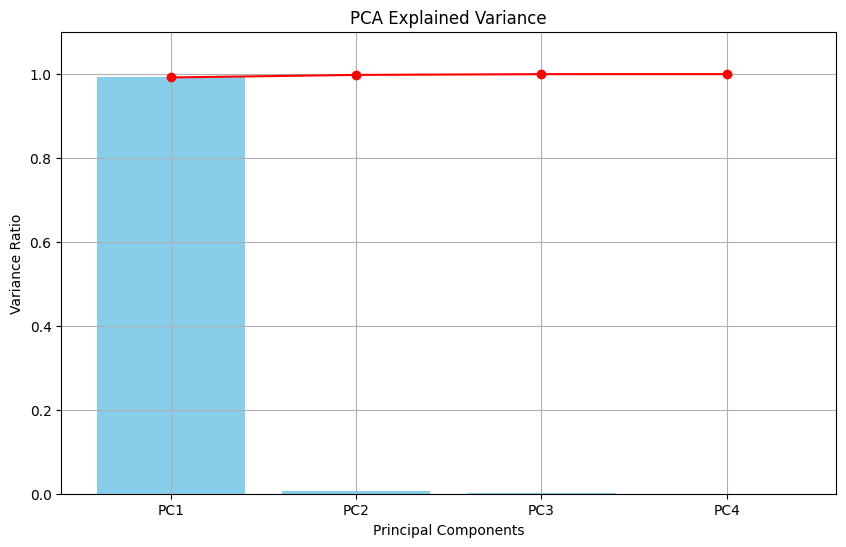

  Principal Component  Explained Variance Ratio  Cumulative Explained Variance
0                 PC1                  0.991113                       0.991113
1                 PC2                  0.006024                       0.997138
2                 PC3                  0.001827                       0.998965
3                 PC4                  0.000101                       0.999065


In [35]:
# Get the explained variance ratios
explained_variance_ratios_1 = pca_1.explained_variance_ratio_

# Create a DataFrame for the explained variance ratios
explained_variance_1_df = pd.DataFrame({
    'Principal Component': ['PC1', 'PC2', 'PC3', 'PC4'],
    'Explained Variance Ratio': explained_variance_ratios_1
})

# Calculate cumulative explained variance
explained_variance_1_df['Cumulative Explained Variance'] = explained_variance_1_df['Explained Variance Ratio'].cumsum()

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(explained_variance_1_df['Principal Component'], explained_variance_1_df['Explained Variance Ratio'], color='skyblue')
plt.plot(explained_variance_1_df['Principal Component'], explained_variance_1_df['Cumulative Explained Variance'], marker='o', color='red')
plt.title('PCA Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

# Display the explained variance DataFrame
print(explained_variance_1_df)